# Compartive genomics of phage genomes
Stephen Wandro  
last updated 3/22/2022

In [1]:
# Basic imports
import pandas as pd
import itertools

# Biology imports
from dna_features_viewer import GraphicFeature, GraphicRecord
from Bio import Phylo

# Plotting imports
import plotnine as pn
import matplotlib.pyplot as plt
import matplotlib

Helper functions

In [2]:
def import_gff(file):
    with open(file, 'r') as openfile:
        out = []
        for line in openfile:
            if line.strip() == "##FASTA" or line[0] == ' ':
                break
            if line[0] == "#":
                continue
            L = line.split('\t')
            gene = {}
            gene["start"] = int(L[3])
            gene["end"] = int(L[4])
            gene["strand"] = 1 if L[6]=="+" else -1
            gene['id'] = L[8].split(';')[0].split('=')[1]
            gene['product'] = line.split(';')[-1].split('=')[1].strip()
            out.append(gene)
    return(out)

def pct_identity(genome1, genome2):
    assert len(genome1) == len(genome2)
    matches = 0
    tot = len(genome1)
    for i in range(tot):
        if genome1[i] == genome2[i]:
            matches += 1
    return(matches/tot)

In [3]:
!cat roary_output/myo/_1619641837/summary_statistics.txt

cat: roary_output/myo/_1619641837/summary_statistics.txt: No such file or directory


# Import gene presence info

In [4]:
myo_presence = pd.read_csv("roary_output/myo/_1619651634/gene_presence_absence.csv")
sipho_presence = pd.read_csv("roary_output/sipho/_1619723868/gene_presence_absence.csv")

sipho_phages = ['CCS2', 'CCS3','P11_phage', 'P13_phage', 'P2_phage', 'P9_phage', 'SDS1', 'SDS2','Toy']
myo_phages = ['Ben', 'Bill', 'Bob', 'Bop','CCS1', 'Car', 'Carl', 'TEX', 'V12']
koch = ["Bob","Car","Carl"]
shiek = ["Ben","Bill","Bop","CCS1","TEX","V12"]
myo_presence["koch_seqs"] = myo_presence[koch].apply(axis=1, func= lambda row: sum([x==x for x in row]))
myo_presence["shiek_seqs"] = myo_presence[shiek].apply(axis=1, func= lambda row: sum([x==x for x in row]))
myo_presence.head()

,Gene,Non-unique Gene name,Annotation,No. isolates,No. sequences,Avg sequences per isolate,Genome Fragment,Order within Fragment,Accessory Fragment,Accessory Order with Fragment,...,Bill,Bob,Bop,CCS1,Car,Carl,TEX,V12,koch_seqs,shiek_seqs
0,group_1,NaN,Virion protein 4,9,9,1,1,96,NaN,NaN,...,BMFEEFKN_00167,MLFNPOEP_00164,LPIHEJCG_00183,ILFNCBME_00174,HGEFLFKG_00166,AHGFFIMK_00156,OFPAFGCJ_00165,GLLPMOLK_00187,3,6
1,group_116,NaN,hypothetical protein,9,9,1,1,60,NaN,NaN,...,BMFEEFKN_00138,MLFNPOEP_00134,LPIHEJCG_00154,ILFNCBME_00142,HGEFLFKG_00136,AHGFFIMK_00124,OFPAFGCJ_00137,GLLPMOLK_00158,3,6
2,group_127,NaN,hypothetical protein,9,9,1,1,341,NaN,NaN,...,BMFEEFKN_00127,MLFNPOEP_00123,LPIHEJCG_00143,ILFNCBME_00129,HGEFLFKG_00125,AHGFFIMK_00113,OFPAFGCJ_00126,GLLPMOLK_00147,3,6
3,group_13,NaN,hypothetical protein,9,9,1,1,337,NaN,NaN,...,BMFEEFKN_00131,MLFNPOEP_00127,LPIHEJCG_00147,ILFNCBME_00133,HGEFLFKG_00129,AHGFFIMK_00117,OFPAFGCJ_00130,GLLPMOLK_00151,3,6
4,group_134,NaN,hypothetical protein,9,9,1,1,111,NaN,NaN,...,BMFEEFKN_00180,MLFNPOEP_00177,LPIHEJCG_00197,ILFNCBME_00189,HGEFLFKG_00179,AHGFFIMK_00169,OFPAFGCJ_00180,GLLPMOLK_00200,3,6


# Sipho core/accessory genes

### Get core, accesory, and unique genes for each Sipho genome

In [6]:
sipho_core = {}
sipho_acc = {}
sipho_uni = {}
for phage in sipho_phages:
    a = sipho_presence.loc[sipho_presence[phage].notna()]
    cores = len(a.query('`No. isolates` == 9'))
    accs = len(a.query('`No. isolates` != 9'))
    uni = len(a.query('`No. isolates` == 1'))
    sipho_core[phage] = cores
    sipho_acc[phage] = accs
    sipho_uni[phage] = uni

### Make figure of core/acccessory gene count for Sipho phages

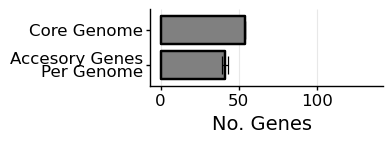

<ggplot: (8767745918418)>

In [135]:
dat = pd.DataFrame([["Core Genome",54,54,54],["Accesory Genes\nPer Genome",41,43,39]], index=[1,2], columns = ["lab","ct","errp","errn"])
pn.options.figure_size = (3,1)

p = (pn.ggplot(data = dat)  +
    pn.geom_bar( pn.aes(x="lab", y="ct"), stat="identity", fill="grey", color="black", size=1, width=.8) +
     pn.geom_errorbar(pn.aes( x="lab",ymax = "errp", ymin="errn")) +
     pn.theme_classic() +
     pn.scale_y_continuous(limits=[0,135]) +
     pn.labs(y="No. Genes", x='') +
     pn.coord_flip() +
     pn.theme(text = pn.element_text(color="black"),
             panel_grid_major_x = pn.element_line(color="lightgrey", alpha=.5),
             axis_title = pn.element_text(size=14),
             axis_text = pn.element_text(size=12),)
    )
p

# Myo core/accessory genes

In [9]:
myo_core = {}
myo_acc = {}
myo_uni = {}
for phage in myo_phages:
    a = myo_presence.loc[myo_presence[phage].notna()]
    cores = len(a.query('`No. isolates` == 9'))
    accs = len(a.query('`No. isolates` != 9'))
    uni = len(a.query('`No. isolates` == 1'))
    myo_core[phage] = cores
    myo_acc[phage] = accs
    myo_uni[phage] = uni

### Make figure of core/acccessory gene count for Myo phages

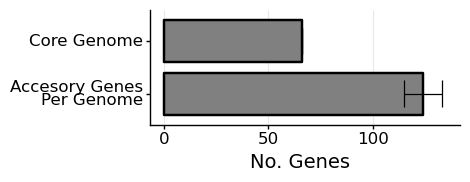

<ggplot: (8767745918715)>

In [134]:
dat = pd.DataFrame([["Core Genome",66,66,66],["Accesory Genes\nPer Genome",124,133,115]], index=[1,2], columns = ["lab","ct","errp","errn"])
pn.options.figure_size = (4,1.5)

p = (pn.ggplot(data = dat)  +
    pn.geom_bar( pn.aes(x="lab", y="ct"), stat="identity", fill="grey", color="black", size=1, width=.8) +
     pn.geom_errorbar(pn.aes( x="lab",ymax = "errp", ymin="errn")) +
     pn.theme_classic() +
     pn.scale_y_continuous(limits=[0,135]) +
     pn.labs(y="No. Genes", x='') +
     pn.coord_flip() +
     pn.theme(text = pn.element_text(color="black"),
             panel_grid_major_x = pn.element_line(color="lightgrey", alpha=.5),
             axis_title = pn.element_text(size=14),
             axis_text = pn.element_text(size=12),)
    )
p

# Import genome annotation .gff files

In [10]:
gffs = {}

gff_files = !ls ../comarative_genomics/gffs/sipho/
for file in gff_files:
    name=file.split('.')[0]
    gff = import_gff("../comarative_genomics/gffs2/sipho/" + file)
    gffs[name] = gff
    
gff_files = !ls ../comarative_genomics/gffs/myo/
for file in gff_files:
    name=file.split('.')[0]
    gff = import_gff("../comarative_genomics/gffs/myo/" + file)
    gffs[name] = gff

### Using SDS1 as the representative sipho genome that will be visualized  
For each gene in SDS1 genome, count the number of other Sipho phages that have that gene. Will color plot by this number

In [11]:

sds1_gene_counts = {}
for gene in gffs["SDS1"]:
    gene_id = gene["id"]
    tmp = sipho_presence.query('SDS1 == @gene_id')
    if len(tmp)==0:
        sds1_gene_counts[gene_id] = 0
        continue
    ct=0
    for phage in sipho_phages:
        if pd.notna(tmp[phage].iloc[0]):
            ct +=1
    sds1_gene_counts[gene_id] = ct

### Plot SDS1 as representative sipho genome  

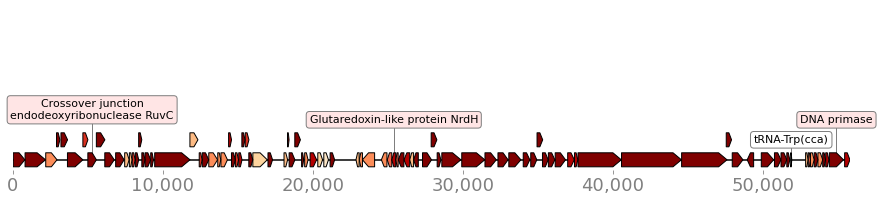

In [102]:
features = []
colors = {i:x for i,x in zip(range(10),["white",'#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000'])}
for gene in gffs["SDS1"]:
    # Include label if gene is annotated
    name = "" if gene["product"] == "hypothetical protein" else gene["product"]
    if name:
        feature = GraphicFeature(start=gene["start"], end=gene["end"], strand=gene["strand"], color=colors[sds1_gene_counts[gene["id"]]], label=name)
    else:
        feature = GraphicFeature(start=gene["start"], end=gene["end"], strand=gene["strand"], color=colors[sds1_gene_counts[gene["id"]]])
    features.append(feature)

record = GraphicRecord(sequence_length=gffs["SDS1"][-1]["end"], features=features, ticks_resolution=10000)
fig,ax =  plt.subplots(1, figsize=(15,3))
a = record.plot(figure_width=15,ax = ax)

ax.tick_params(labelsize=18)
plt.savefig("figc.png")

### Using V12 as the representative myo genome that will be visualized  
For each gene in V12 genome, count the number of other Myo phages that have that gene. Will color plot by this number

In [12]:
v12_gene_counts = {}
for gene in gffs["V12"]:
    gene_id = gene["id"]
    tmp = myo_presence.query('V12 == @gene_id')
    if len(tmp)==0:
        v12_gene_counts[gene_id] = 0
        continue
    ct=0
    for phage in myo_phages:
        if pd.notna(tmp[phage].iloc[0]):
            ct +=1
    v12_gene_counts[gene_id] = ct

### Plot V12 as representative myo genome  

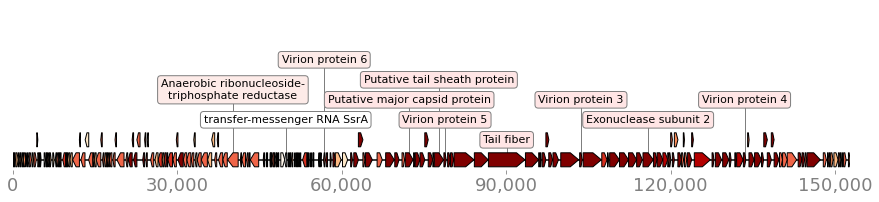

In [14]:
features = []
colors = {i:x for i,x in zip(range(10),["white",'#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000'])}
for gene in gffs["V12"]:
    name = "" if gene["product"] == "hypothetical protein" else gene["product"]
    name = "" if "tRNA" in name else name 
    name = "Tail fiber" if gene["id"] == "GLLPMOLK_00148" else name
    name = name.replace("%2C","")
    if name:
        feature = GraphicFeature(start=gene["start"], end=gene["end"], strand=gene["strand"], color=colors[v12_gene_counts[gene["id"]]], label=name)
    else:
        feature = GraphicFeature(start=gene["start"], end=gene["end"], strand=gene["strand"], color=colors[v12_gene_counts[gene["id"]]])
    features.append(feature)

record = GraphicRecord(sequence_length=gffs["V12"][-1]["end"], features=features , ticks_resolution=30000)
fig,ax =  plt.subplots(1, figsize=(15,3))
a = record.plot(figure_width=15,ax = ax)

ax.tick_params(labelsize=18)
plt.savefig("figf.png")

### Make legend for color scale

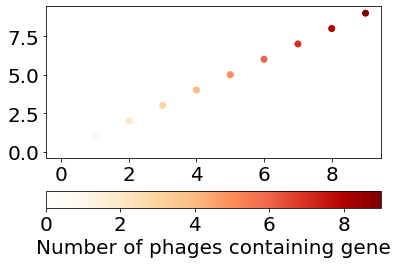

In [94]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",'#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000'])
a = plt.scatter(range(10),range(10),c=range(10), cmap=cmap)
plt.colorbar(orientation='horizontal', label="Number of phages containing gene")
plt.rcParams.update({'font.size': 18})
plt.show()

# Phylogenetic trees
Based on core genome alignments from Roary

### Sipho

/tmp/ipykernel_4681/3887335313.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


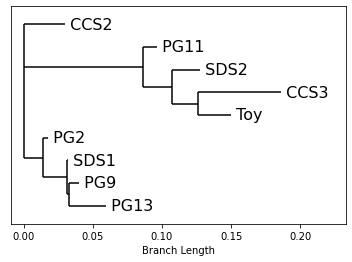

In [20]:
tree = Phylo.read("sipho_tree.newick", "newick")
fig, ax = plt.subplots(1, figsize=(6,4))

matplotlib.rcParams.update({'font.size': 16})
a = Phylo.draw(tree, axes = ax, show_confidence=False, do_show=False)
ax.set_xlabel("Branch Length")
ax.set_ylabel("")
ax.set_yticks([])
fig.show()


### Myo

[]

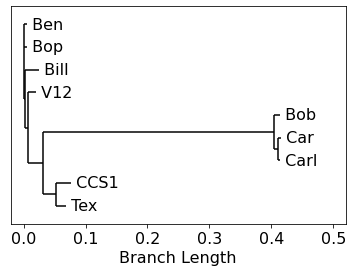

In [125]:
tree = Phylo.read("myo_tree.newick", "newick")
fig, ax = plt.subplots(1, figsize=(6,4))
matplotlib.rcParams.update({'font.size': 16})
a = Phylo.draw(tree, axes = ax, show_confidence=False, do_show=False)
ax.set_xlabel("Branch Length")
ax.set_ylabel("")
ax.set_yticks([])


# Genome idenety heatmaps

Import core genome alignment % identity info

In [4]:
# Sipho
sipho_alignment = "roary_output/sipho/_1619723868/core_gene_alignment.aln"
with open(sipho_alignment,'r') as openfile:
    sipho_genomes = {}
    seq = ''
    for line in openfile:
        if line[0] == ">":
            if seq:
                sipho_genomes[genome] = seq
            genome = line[1:].strip()
            seq = ''
        else:
            seq += line.strip()
        
all_genomes = list(sipho_genomes.keys())
all_combos = list(itertools.combinations(all_genomes, 2))

sipho_identity_out = []
for genome1, genome2 in all_combos:
    pct = pct_identity(sipho_genomes[genome1], sipho_genomes[genome2])
    sipho_identity_out.append([genome1, genome2, pct])
sipho_identity_df = pd.DataFrame(sipho_identity_out, columns=["genome1","genome2","core_identity"])

# Myo
myo_alignment = "roary_output/myo/_1619651634/core_gene_alignment.aln"
with open(myo_alignment,'r') as openfile:
    myo_genomes = {}
    seq = ''
    for line in openfile:
        if line[0] == ">":
            if seq:
                myo_genomes[genome] = seq
            genome = line[1:].strip()
            seq = ''
        else:
            seq += line.strip()
        myo_genomes[genome] = seq
        
all_genomes = list(myo_genomes.keys())
all_combos = list(itertools.combinations(all_genomes, 2))

myo_identity_out = []
for genome1, genome2 in all_combos:
    pct = pct_identity(myo_genomes[genome1], myo_genomes[genome2])
    myo_identity_out.append([genome1, genome2, pct])
myo_identity_df = pd.DataFrame(myo_identity_out, columns=["genome1","genome2","core_identity"])   

### Plot some heatmaps 

[Text(0, 0.5, 'Bop'),
 Text(0, 1.5, 'Bill'),
 Text(0, 2.5, 'V12'),
 Text(0, 3.5, 'Bob'),
 Text(0, 4.5, 'Car'),
 Text(0, 5.5, 'Carl'),
 Text(0, 6.5, 'CCS1'),
 Text(0, 7.5, 'TEX')]

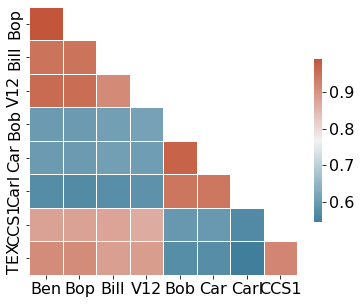

In [26]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tmp = pd.DataFrame(index=myo_phages, columns=myo_phages)
for x in myo_identity_out:
    tmp.loc[x[0],x[1]] = x[2]
    tmp.loc[x[1],x[0]] = x[2]
tmp = tmp.fillna(0)

df = myo_identity_df.pivot(index="genome1", columns="genome2", values = "core_identity").transpose()
sipho_order = ["CCS2","PG11","SDS2","CCS3","toy","PG2","SDS1","PG9","PG13"]
myo_order = ["Ben","Bop","Bill","V12","Bob","Car","Carl","CCS1","TEX"]
tmp = tmp.loc[myo_order,myo_order]
tmp = tmp.iloc[1:,:8]
#mask[0,0] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
dat = np.array(tmp)
mask =  np.invert(np.tril(np.ones_like(dat, dtype=bool)))

# Draw the heatmap with the mask and correct aspect ratio

a = sns.heatmap(dat , mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_xticklabels(myo_order[:8])
ax.set_yticklabels(myo_order[1:])

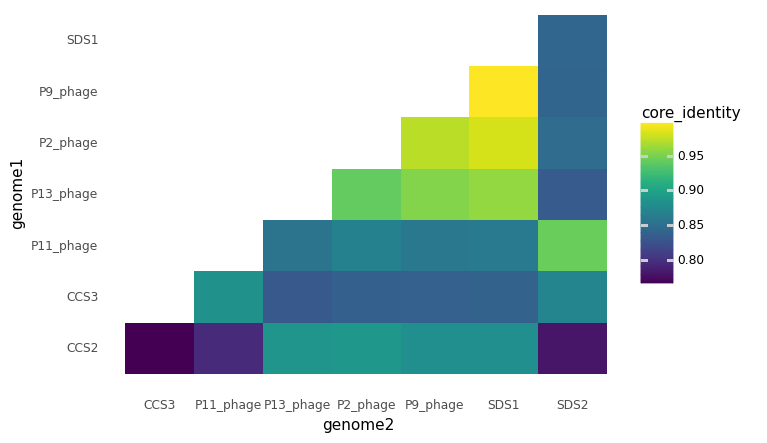

<ggplot: (8773526722503)>

In [27]:
plot_dat = sipho_identity_df.query('genome1 != "CCS4" and genome2 != "CCS4"').copy()
plot_dat["genome1"] = pd.Categorical(plot_dat.genome1, categories = sipho_phages)
plot_dat["genome2"] = pd.Categorical(plot_dat.genome2, categories = sipho_phages)


p = (pn.ggplot(data = plot_dat) +
    pn.geom_tile(pn.aes(x="genome1", y="genome2", fill="core_identity")) +
     pn.theme_minimal() +
     pn.coord_flip() +
     pn.theme(
     panel_grid = pn.element_blank()
     )
    )
p